In [32]:
import os
import numpy as np
import librosa
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Masking
import matplotlib.pyplot as plt


In [33]:
def extract_chroma_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    return chroma.T  # Transpose to have time axis first

def load_dataset(directory):
    features = []
    labels = []
    filenames = []
    for subdir, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.wav'):
                file_path = os.path.join(subdir, file)
                chroma_features = extract_chroma_features(file_path)
                features.append(chroma_features)
                labels.append(os.path.basename(subdir))  # Assuming subdirectory names are labels
                filenames.append(file_path)
    return features, labels, filenames
# Example usage
features, labels, filenames = load_dataset(r"C:\Users\Sachin\Desktop\ai_projects\Voice_signature_project\dataset_alexa")


In [34]:
features,labels

([array([[0.59239674, 1.        , 0.8720273 , 0.5841648 , 0.58768773,
          0.47427356, 0.377856  , 0.56143606, 0.6161076 , 0.45968133,
          0.60468376, 0.6867935 ],
         [0.66749257, 0.9591241 , 1.        , 0.7701568 , 0.6397071 ,
          0.62081647, 0.6598642 , 0.6001705 , 0.4382986 , 0.50824165,
          0.5358989 , 0.5520113 ],
         [0.42890668, 0.39062038, 0.2566836 , 0.4492863 , 0.4610753 ,
          1.        , 0.64430106, 0.17445385, 0.09332686, 0.15412582,
          0.0743669 , 0.10325294],
         [0.4474272 , 0.2783825 , 0.26654014, 0.44145295, 0.6175512 ,
          1.        , 0.44788024, 0.13618228, 0.11789072, 0.17320706,
          0.11740085, 0.26883838],
         [0.88000363, 0.9048153 , 0.21655723, 0.25978726, 0.47233462,
          1.        , 0.7777474 , 0.15329765, 0.14658886, 0.30311435,
          0.26483613, 0.3178503 ],
         [0.46958944, 1.        , 0.14104743, 0.05807442, 0.08141053,
          0.3312095 , 0.6361503 , 0.11846785, 0.0595940

In [37]:
# Print the shape of extracted features
print(f"Number of samples: {len(features)}")
print(f"Shape of first sample's features: {features[0].shape}")
features = np.array(features)

Number of samples: 198
Shape of first sample's features: (17, 12)


In [39]:
# from sklearn.preprocessing import LabelEncoder
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# # Encode labels to integers
# label_encoder = LabelEncoder()
# encoded_labels = label_encoder.fit_transform(labels)

# # Pad sequences to the same length
# max_sequence_length = max([len(f) for f in features])
# padded_features = pad_sequences(features, maxlen=max_sequence_length, dtype='float32', padding='post', truncating='post')

# # Convert labels to one-hot encoding
# num_classes = len(label_encoder.classes_)
# encoded_labels = np.eye(num_classes)[encoded_labels]
# # Print shapes after preprocessing
# print(f"Padded features shape: {padded_features.shape}")
# print(f"Encoded labels shape: {encoded_labels.shape}")

In [38]:
# Encode labels to integers
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Convert labels to one-hot encoding
num_classes = len(label_encoder.classes_)
encoded_labels = np.eye(num_classes)[encoded_labels]

# Print shapes after preprocessing
print(f"Features shape: {features.shape}")
print(f"Encoded labels shape: {encoded_labels.shape}")

Features shape: (198, 17, 12)
Encoded labels shape: (198, 2)


In [16]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Masking

# # Build the LSTM model
# model = Sequential()
# model.add(Masking(mask_value=0., input_shape=(max_sequence_length, 12)))  # 12 chroma features
# model.add(LSTM(32, return_sequences=False))
# model.add(Dense(num_classes, activation='sigmoid'))

In [44]:
model = Sequential()
model.add(Masking(mask_value=0., input_shape=(17, 12)))  
model.add(LSTM(32, return_sequences=False))
model.add(Dense(num_classes, activation='sigmoid'))

In [45]:
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_6 (Masking)          (None, 17, 12)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 32)                5760      
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 66        
Total params: 5,826
Trainable params: 5,826
Non-trainable params: 0
_________________________________________________________________


In [46]:
# # Train the model
model.fit(padded_features, encoded_labels, epochs=20, batch_size=32, validation_split=0.2)


Train on 158 samples, validate on 40 samples
Epoch 1/20
158/158 [==============================] - ETA: 1s - loss: 0.6894 - acc: 0.531 - 1s 4ms/sample - loss: 0.6926 - acc: 0.4557 - val_loss: 0.6934 - val_acc: 0.7500
Epoch 2/20
158/158 [==============================] - ETA: 0s - loss: 0.6899 - acc: 0.531 - 0s 416us/sample - loss: 0.6837 - acc: 0.6646 - val_loss: 0.7295 - val_acc: 0.0000e+00
Epoch 3/20
158/158 [==============================] - ETA: 0s - loss: 0.6810 - acc: 0.625 - 0s 397us/sample - loss: 0.6746 - acc: 0.6835 - val_loss: 0.7614 - val_acc: 0.0000e+00
Epoch 4/20
158/158 [==============================] - ETA: 0s - loss: 0.6714 - acc: 0.656 - 0s 395us/sample - loss: 0.6659 - acc: 0.6835 - val_loss: 0.7822 - val_acc: 0.0000e+00
Epoch 5/20
158/158 [==============================] - ETA: 0s - loss: 0.6561 - acc: 0.687 - 0s 407us/sample - loss: 0.6579 - acc: 0.6835 - val_loss: 0.7976 - val_acc: 0.0000e+00
Epoch 6/20
158/158 [==============================] - ETA: 0s - loss: 0

In [47]:
# Evaluate the model
loss, accuracy = model.evaluate(padded_features, encoded_labels)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Save the model
# model.save('lstm_chroma_model.h5')


198/198 [==============================] - ETA: 0s - loss: 0.0151 - acc: 1.000 - 0s 125us/sample - loss: 0.0670 - acc: 1.0000
Loss: 0.06695742491218779, Accuracy: 1.0


In [48]:
loss,accuracy

(0.06695742491218779, 1.0)

In [49]:
# Generate predictions and plot confusion matrix
y_pred = model.predict(padded_features)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(encoded_labels, axis=1)

In [50]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

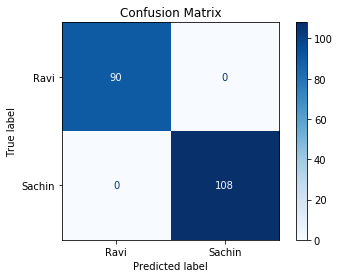

In [51]:
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [52]:
# Print filenames of incorrectly predicted samples
incorrect_indices = np.where(y_pred_classes != y_true_classes)[0]
print("Incorrectly predicted files:")
for index in incorrect_indices:
    print(filenames[index])

Incorrectly predicted files:


# Test the Prediction 

In [54]:
from tensorflow.keras.models import Sequential, load_model
import matplotlib.pyplot as plt
# Load the trained model for prediction
model = load_model('lstm_chroma_model.h5')

def predict(file_path):
    # Extract chroma features
    chroma_features = extract_chroma_features(file_path)
    chroma_features = chroma_features[np.newaxis, ...]  # Add batch dimension

    # Pad sequence to the same length
    padded_features = pad_sequences(chroma_features, maxlen=max_sequence_length, dtype='float32', padding='post', truncating='post')

    # Make prediction
    prediction = model.predict(padded_features)
    predicted_class = np.argmax(prediction, axis=1)
    predicted_label = label_encoder.inverse_transform(predicted_class)
    
    return predicted_label[0]

# Test the prediction function
test_file_path = r"C:\Users\Sachin\Desktop\ai_projects\Voice_signature_project\dataset_alexa\Sachin\Alexa_Sachin_1_1.wav" # Replace with the path to your test WAV file
predicted_label = predict(test_file_path)
print(f'Predicted label for the test file: {predicted_label}')

Predicted label for the test file: Sachin
